# Homework 5: Regression Inference and Analyzing Residuals

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by **11:59pm on the due date listed in Canvas**. Start early so that you can come to office hours if you're stuck. Check Canvas for the office hours schedule. Late work will not be accepted as per the policies described in the Canvas syllabus. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import seaborn as sns

import otter
grader = otter.Notebook()
'imports complete'


'imports complete'

## Regression Diagnosis for the NFL Draft

This homework will build on and extend the work you did in the lab.

In the lab you developed a regression model for the relationship between draft position and success in the NFL. In this assignment you will be assessing your model's fit, and extending the idea of confidence intervals to prediction intervals. 

In [2]:
# Just run this cell!
nfl = pd.read_csv("nfl.csv")
nfl["Career Length"] = 2020 - nfl["Year Drafted"]

nfl.head(5)

,Player,Salary,Year Drafted,Pick Number,Position,Career Length
0,Baker Mayfield,570000,2018,1,QB,2
1,Cam Newton,16200000,2011,1,QB,9
2,Eli Manning,11500000,2004,1,QB,16
3,Eric Fisher,10350000,2013,1,OT,7
4,Jadeveon Clowney,15967200,2014,1,DE,6


Please redefine a number of functions that you made in the lab and in previous assignments.

In [7]:
# Argument takes an array or series and standardizes them
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

# Take a DataFrame and two columns and return the correlation between them. Use your standard units function
def correlation(tbl, col1, col2):
    r = standard_units(tbl[col1]) * standard_units(tbl[col2])
    return np.mean(r)

# Take a DataFrame and two columns, resample the table with full replacement and return the correlation between the two resampled columns
def one_resample_r(tbl, col1, col2):
    sampled_tbl = tbl.sample(frac =1, replace=True)
    return correlation(sampled_tbl, col1, col2)

## Analyzing Residuals

Returning to the NFL data, we want to predict both Career Length and Salary based on a player's Pick Number. To understand what their Career Length and Salary might be, we want to generate confidence intervals of possible values for both career length and salary. First, let's investigate how effective our predictions for career length and salary based on pick number are.

#### Question 1

Calculate the slope and intercept for the line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`. Assign these values to `career_length_slope`, `career_length_intercept`, `salary_slope`, and `salary_intercept` respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting career length and salary **based off** a pick number. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*

In [13]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(tbl, colx, coly):
    x = tbl[colx]
    y = tbl[coly]
    
    r = correlation(tbl, colx, coly)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_sd = np.std(x)
    y_sd = np.std(y)
    
    slope = (y_sd / x_sd) * r
    intercept = y_mean - (slope * x_mean)
    return np.array([slope, intercept])

career_length_slope = parameters(nfl,'Pick Number', 'Career Length')[0]
career_length_intercept = parameters(nfl,'Pick Number','Career Length')[1]

salary_slope = parameters(nfl,'Pick Number','Salary')[0]
salary_intercept = parameters(nfl,'Pick Number','Salary')[1]

In [14]:
grader.check("q1_1")

q1_1 results: All test cases passed!

#### Question 2

Draw a scatter plot of the residuals for each line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`.

*Hint: We want to get the predictions for every player in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*

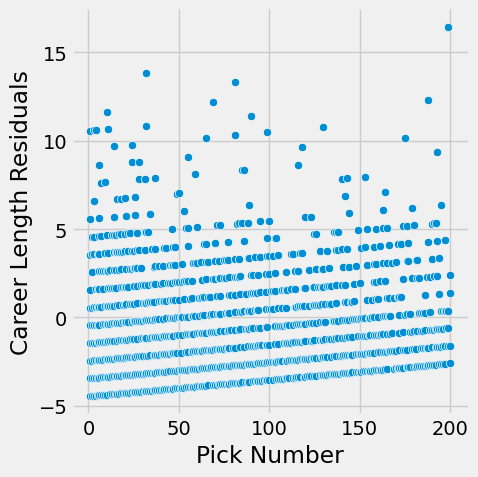

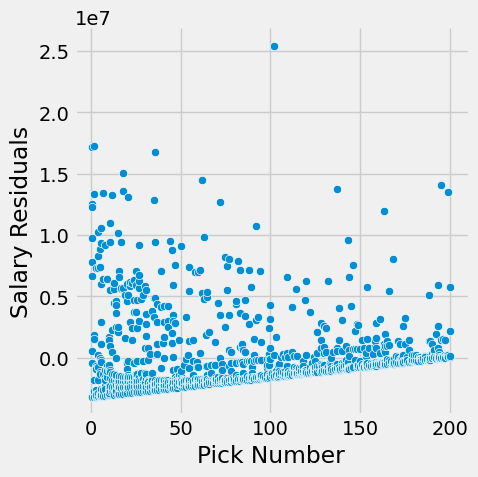

In [15]:
predicted_career_lengths = career_length_slope * nfl["Pick Number"] + career_length_intercept
predicted_salaries = salary_slope * nfl["Pick Number"] + salary_intercept



career_length_residuals = nfl["Career Length"] - predicted_career_lengths
salary_residuals = nfl["Salary"] - predicted_salaries

nfl_with_residuals = nfl.copy()
nfl_with_residuals["Career Length Residuals"] = career_length_residuals
nfl_with_residuals["Salary Residuals"] = salary_residuals

#Now generate two scatter plots!
sns.relplot(x = "Pick Number", y = "Career Length Residuals", data = nfl_with_residuals)
sns.relplot(x = "Pick Number", y = "Salary Residuals", data = nfl_with_residuals);

Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

#### Question 3

Based on these plots of residuals, do you think linear regression is a good model for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`? Explain for both.

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->
<!-- EXPORT TO PDF -->

I do not think linear regression is a good model for both residuals. 

For Pick number vs Career Length, the line is misshaped showing that it doesnt correctly predict the picks. Therefore this simple linear model is not appropriate. 

For the Pick Number vs Salary, the model shows a widening spread that would suggest theres heteroscedasticity. This would go against the constant‑variance assumption of a zero mean.

#### Question 4

Assign `career_length_residual_corr` and `salary_residual_corr` to either 1, 2 or 3 corresponding to whether or not the correlation between `Pick Number` and `Career Length Residuals` is positive, zero, or negative, and to whether or not the correlation between `Pick Number` and `Salary Residuals` is positive, zero, or negative respectively.

1. Positive
2. Zero
3. Negative

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [20]:
career_length_residual_corr = 3
salary_residual_corr = 2

In [21]:
grader.check("q1_4")

q1_4 results: All test cases passed!

It looks like the largest residuals are positive residuals, so let's investigate those more closely.

#### Question 5

Let's investigate where our regression line is making errors. Using the `nfl_with_residuals` table, assign `greatest_career_length_residual` to the string that is the name of the player with the largest positive residual for `Pick Number` vs `Career Length`. Note that if you subset by index, you'll want to use `.iloc[]` to do so (try subsetting without it to see what happens). 


<!--
BEGIN QUESTION
name: q1_16
manual: false
-->

In [23]:
greatest_career_length_residual = nfl_with_residuals.sort_values("Career Length Residuals", ascending=False).iloc[0]["Player"] 
greatest_career_length_residual

'Tom Brady'

In [24]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Now let's investigate the residuals for salary. Run the cell below to see the players with the largest residuals for `Pick Number` vs `Salary`.

In [25]:
nfl_with_residuals.sort_values(by = "Salary Residuals", ascending = False).iloc[np.arange(10),:]

,Player,Salary,Year Drafted,Pick Number,Position,Career Length,Career Length Residuals,Salary Residuals
711,Kirk Cousins,27500000,2012,102,QB,8,3.491875,2.542259e+07
12,Marcus Mariota,20922000,2015,2,QB,5,-0.435312,1.722160e+07
5,Jameis Winston,20922000,2015,1,QB,5,-0.444584,1.720537e+07
304,Derek Carr,19900000,2014,36,QB,6,0.879931,1.675141e+07
157,Joe Flacco,18500000,2008,18,QB,12,6.713038,1.505928e+07
477,Jimmy Garoppolo,17200000,2014,62,QB,6,1.121000,1.447339e+07
1139,Antonio Brown,14625000,2010,195,WR,10,6.354159,1.405697e+07
887,Grady Jarrett,15209000,2015,137,DT,5,0.816391,1.369963e+07
160,Melvin Ingram,17000000,2012,18,DE,8,2.713038,1.355928e+07
1157,Tom Brady,14000000,2000,199,QB,20,16.391247,1.349688e+07


#### Question 6

What patterns do you notice with these large residuals for salary? How could this affect our analysis?

The Pick Number alone doesn't account for the players position or veteran‑status of the salary. Tom Brady withe the greatest career length doesnt have the largest salary residual. In addition, the residuals are large, clustered, and position‑dependent, therefore the the linear model is biased.

## Prediction Intervals

Now, let's predict career length based on a specific pick number, *e.g.* 169. Instead of using the best fit line generated from the sample, we want to generate an interval for the predicted career length.

#### Question 7

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`.

*Hint: Remember you defined the `parameters` function earlier*

In [28]:
def one_resample_prediction(tbl, colx, coly, xvalue):
    resample = tbl.sample(frac=1, replace=True)
    resample_parameters = parameters(resample, colx, coly)
    
    slope = resample_parameters[0]
    intercept = resample_parameters[1]
    return slope * xvalue + intercept

career_length_pred = one_resample_prediction(nfl, "Pick Number", "Career Length", 169)
career_length_pred

3.9555845465250217

In [29]:
grader.check("q1_7")

q1_7 results: All test cases passed!

#### Question 8

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for career length based on a pick number of 169, and then generate a histogram of it.

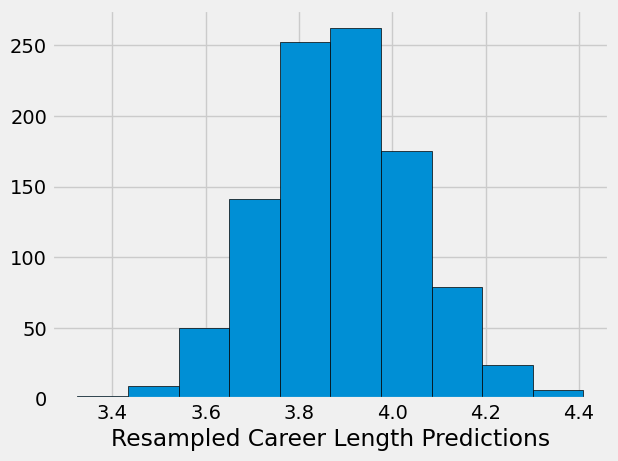

In [34]:
resampled_predictions = np.empty(0)

for i in np.arange(1000):
    resamp = one_resample_prediction(nfl,'Pick Number', 'Career Length', 169)
    resampled_predictions = np.append(resampled_predictions, resamp)

# Create a histogram of the resulting predictions
plt.hist(resampled_predictions, edgecolor='black')
plt.xlabel("Resampled Career Length Predictions");

#### Question 9

Using `resampled_predictions` from Question 8, generate a 99% confidence interval for predicted career lengths.

In [39]:
lower_bound_evan = np.percentile(resampled_predictions, 0.5)
upper_bound_evan = np.percentile(resampled_predictions, 99.5)

# Don't delete/modify the code below in this cell
print(f"99% CI: [{lower_bound_evan}, {upper_bound_evan}]")

99% CI: [3.492486835461818, 4.309104251944176]


In [40]:
grader.check("q1_9")

q1_9 results: All test cases passed!

Run the following cell to see a few bootstrapped regression lines, and the predictions they make for a career length from a pick number of 169.

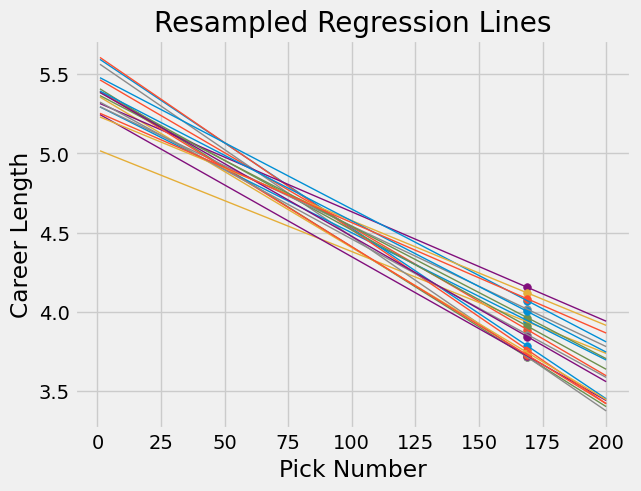

In [38]:
# Just run this cell! 
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = pd.DataFrame({'slope': pd.Series(),'intercept': pd.Series()})
x=169
for i in np.arange(20):
    resamp = nfl.sample(nfl.shape[0], replace = True)
    resample_pars = parameters(resamp, "Pick Number", "Career Length") 
    slope = resample_pars[0]
    intercept = resample_pars[1]
    lines.loc[i] = [slope, intercept]
    
lines['prediction at x='+str(x)] = lines['slope']*x + lines['intercept']
xlims = [min(nfl["Pick Number"]), max(nfl["Pick Number"])]
left = xlims[0]*lines["slope"] + lines["intercept"]
right = xlims[1]*lines["slope"] + lines["intercept"]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("Career Length");
plt.xlabel("Pick Number");
plt.title("Resampled Regression Lines");

#### Question 10

Does the Central Limit Theorem guarantee that the bootstrapped slopes or bootstrapped correlations will be normally distributed for any dataset that uses a large random sample? If you think yes, assign `True` to `clt_applies`, otherwise assign `False` to `clt_applies` if you think no. Are residuals normally distributed? If you think they are, assign `True` to `residuals_normal`, otherwise assign `False` to `residuals_normal`.

In [43]:
clt_applies = False
residuals_normal = False

In [44]:
grader.check("q1_10")

q1_10 results: All test cases passed!

#### Question 11

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread how this data/`nfl` table was generated.*

There are many biases in this dataset. One is that our sample wasn't random. The table only contains drafted players whose salary information was available online and whose careers were long enough to be in public records. Since the player pool is from 2000-2015, it doesnt take in to account inflation and the adjustment of salaries over time. Also, it doesn't take in to account the different postions. It is known that Quarterbacks, edge rushers and a few others typically earn more money. Lastly, the numeric value from pick 1 to pick 2 is not the same as going from 1 to 2 in draft terms. Yet the model treats it as linear.

## (OPTIONAL, Out of Scope) Extending Linear Regression

This following section is completely **optional**, meaning there's no code to be graded/filled in. Just run the cells/explore if you're interested.

In the past few weeks you have learned one of the most powerful tools in a data scientist's arsenal: regression. At this point you may be wondering: what do we do when our data is not linear? You have learned that you shouldn't try and force models when they are bad fits: for example, if we detect heteroscedasticity in our residuals plot, we know that linear regression is a bad fit.

How can we fit data that is not linear then?

Let's increase our data's complexity a little: instead of linear data, let's look at data that you would naturally model with a parabola instead:

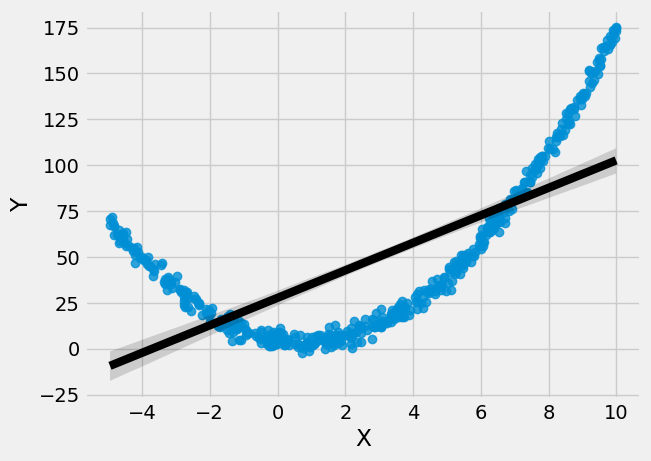

In [45]:
def parabola(x, a=1, b=0, c=0):
    random_noise = np.random.normal(size=len(x)) * 3
    return  a*(x**2) + b*(x) + c + random_noise

size = 500
x_values = np.random.uniform(-5, 10, size=size)
y_values = parabola(x_values, a=2, b=-3, c=5)

sns.regplot(x = "X", y = "Y", data = pd.DataFrame({"X": x_values, "Y": y_values}), line_kws = {"color":"black"});

You can see that our line of best fit is a poor match for this data. Let's look at the residual plot:

In [46]:
from datascience import *

def mse(slope, intercept):
    predicted_y = slope * x_values + intercept
    errors = y_values - predicted_y
    return np.mean(errors**2)


slope_and_intercept = minimize(mse, smooth=True)
predicted_y = slope_and_intercept[0] * x_values + slope_and_intercept[1]
residuals = y_values - predicted_y

sns.relplot(x = "X", y = "Residuals", data = pd.DataFrame({"X": x_values, "Residuals": residuals}));

Our residuals clearly have a pattern, confirming that linear regression is a bad fit for this data! In fact, our residuals actually look like our original data.

Linear regression generates a line that minimizes mean squared error. Using the `minimize` function on the `mse` function does all the work of finding values for us! Can we use `minimize` for more complicated models? Yes! In future data science classes, you will learn how to find these values yourself using the mathematical fields of Linear Algebra (note that it involves lines!) and calculus!

Let's take a look at the equation for a line:

$$y = ax +b$$

There are two parameters here that we can change: $a$, which is the slope, and $b$, which is the intercept.

How about the equation for a parabola?

$$y = ax^2 + bx + c$$

Now there are three parameters, $a,b,c$.

Let's change our mse function to incorporate these three parameters!

In [47]:
def mse_parabola(a, b, c):
    predicted_y = a * (x_values**2) + b * (x_values) + c
    errors = y_values - predicted_y
    return np.mean(errors**2)

The function still returns the mean squared error of our predicted curve, just our curve is now a parabola with the parameters `a`, `b`, and `c`. Let's try and minimize this function!

In [48]:
params = minimize(mse_parabola, smooth=True)
a = params[0]
b = params[1]
c = params[2]
a, b, c

(2.0029412074588042, -3.087948229560995, 4.9797828724853437)

Let's plot our new curve with these values!

In [49]:
x_values_range = np.linspace(-5, 10, 1000)
predicted_y = a * (x_values_range**2) + b * (x_values_range) + c

sns.relplot(x = "X", y = "Y", data = pd.DataFrame({"X": x_values, "Y": y_values}))
plt.plot(x_values_range, predicted_y, color='gold', markersize=1)

Our curve looks like a much better fit now! Let's double check the residuals plot to be sure.

In [50]:
residuals = y_values - (a * (x_values**2) + b * (x_values) + c)

sns.relplot(x = "X", y = "Residuals", data = pd.DataFrame({"X": x_values, "Residuals": residuals}));

A formless cloud, excellent!

What else can the method of least squares do?

Can we predict a single variable based on the values of two other variables? Right now, we don't have a way of doing that. 

If you look at the previous example, you could say that the $x^2$ term is actually a second variable.

Let's generate a dataset to work with. We are going to try and predict `z` based on `x` and `y`.

In [51]:
x_values_range = np.linspace(-5, 10, 1000)

x = 0.5 * np.random.uniform(-5, 10, size=size) + 3
y = np.random.uniform(-5, 10, size=size) - 1
z = 3*x  + (-2*y) -4 + np.random.normal(size=size)

data = pd.DataFrame({"x": x, "y": y, "z": z})
sns.relplot(x = "x", y = "y", data = data)
sns.relplot(x = "x", y = "z", data = data)
sns.relplot(x = "y", y = "z", data = data);

We can see that `x` and `y` would both be very helpful to predict `z` by themselves! However, if we combined them we could predict `z` even better. Since our goal is to minimize mean squared error, let's find the mean squared error of the models that only use `x` and `y` by themselves (using an intercept).

In [52]:
from scipy import stats
def su(x):
    return (x-np.mean(x)) / np.std(x)
def r(x, y):
    return np.mean(su(x) * su(y))

def mse_x(slope, intercept):
    predicted_z = slope * x + intercept
    errors = z - predicted_z
    return np.mean(errors**2)

def mse_y(slope, intercept):
    predicted_z = slope * y + intercept
    errors = z - predicted_z
    return np.mean(errors**2)


slope_and_intercept_x = minimize(mse_x, smooth=True)
predicted_z_x = slope_and_intercept_x[0] * x + slope_and_intercept_x[1]
residuals_x = z - predicted_z_x

sns.relplot(x = "X", y = "Residuals for X Model", data = pd.DataFrame({"X": x, "Residuals for X Model": residuals_x}))

slope_and_intercept_y = minimize(mse_y, smooth=True)
predicted_z_y = slope_and_intercept_y[0] * y + slope_and_intercept_y[1]
residuals_y = z - predicted_z_y

sns.relplot(x = "Y", y = "Residuals for Y Model", data = pd.DataFrame({"Y": y, "Residuals for Y Model": residuals_y}));

Both of the residual plots show no trend, so using these `x` or `y` by themselves would work, but how good are these models? Let's calculate their actual mse.

In [53]:
x_only_mse = mse_x(slope_and_intercept_x[0], slope_and_intercept_x[1])
y_only_mse = mse_y(slope_and_intercept_y[0], slope_and_intercept_y[1])

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}")

X only model MSE: 75.2810431714025, Y only model MSE: 39.32998233920023


Looks like the y only model has lower MSE, so we should try and use that if we can only use `x` or `y`. 

Instead, let's try to build a model that is a combination of `x`, `y` and an intercept `c` to predict `z`!

$$z = ax + by +c$$

In [54]:
def mse_both(a, b, c):
    predicted_z = (a * x) + (b * y) + c
    errors = z - predicted_z
    return np.mean(errors**2)

slope_and_intercept_both = minimize(mse_both, smooth=True)
predicted_z = (slope_and_intercept_both[0] * x) + (slope_and_intercept_both[1] * y) + slope_and_intercept_both[2]
residuals = z - predicted_z

sns.relplot(x = "X", y = "Residuals for Full Model", data = pd.DataFrame({"X": x, "Residuals for Full Model": residuals}))
sns.relplot(x = "Y", y = "Residuals for Full Model", data = pd.DataFrame({"Y": y, "Residuals for Full Model": residuals}));

This model is also a good fit looking at the residuals with respect to both `x` and `y`! What is this model's mse?

In [55]:
full_model_mse = mse_both(slope_and_intercept_both[0], slope_and_intercept_both[1], slope_and_intercept_both[2])

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}, Both X and Y MSE: {full_model_mse}")

X only model MSE: 75.2810431714025, Y only model MSE: 39.32998233920023, Both X and Y MSE: 1.0634316167334923


That MSE is much lower! We should definitely use this model instead of either the x only or y only model independently!
Let's try and visualize what this model looks like with a 3D graph!

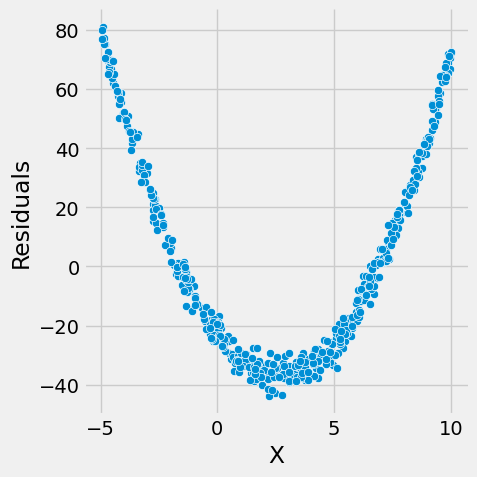

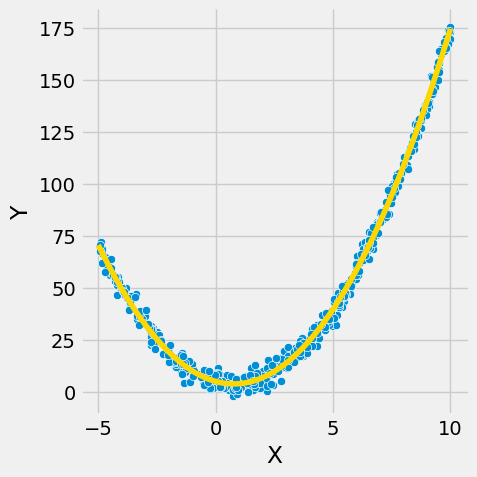

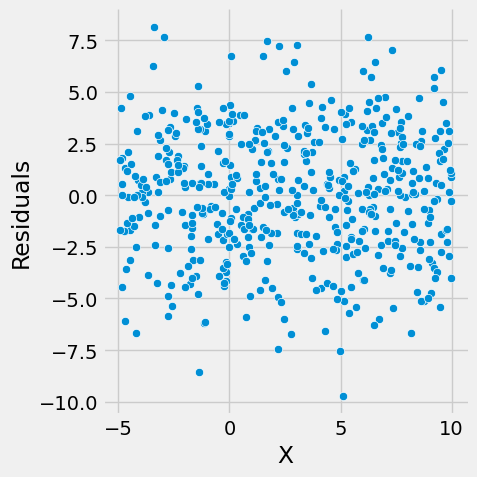

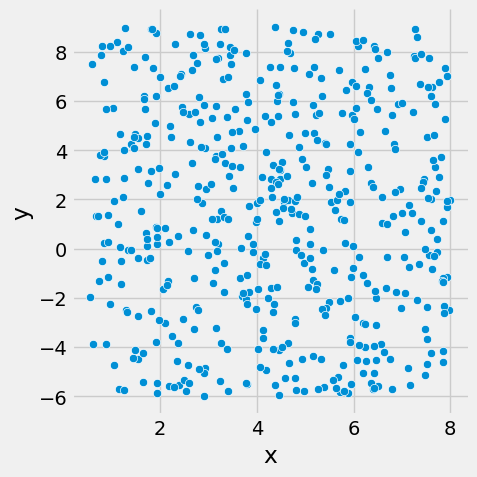

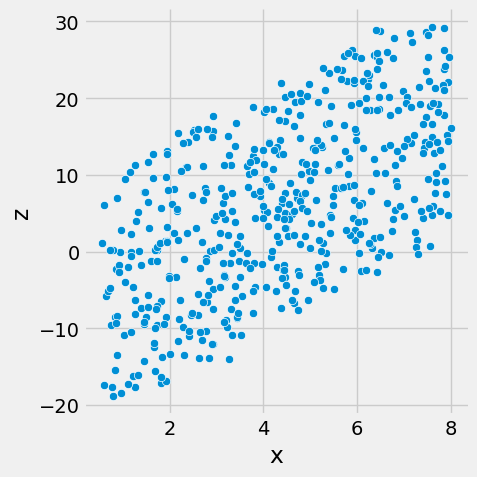

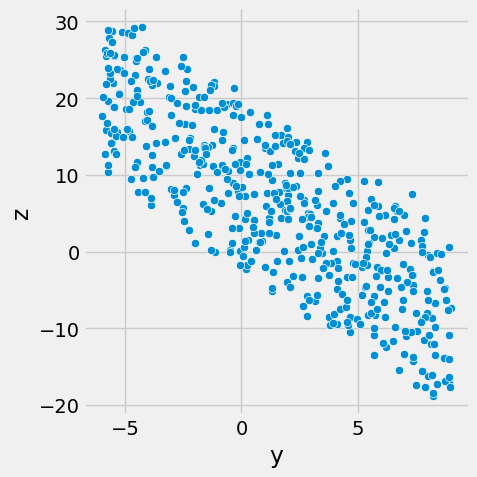

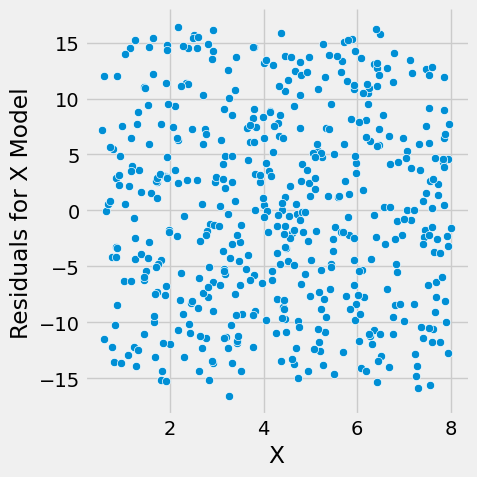

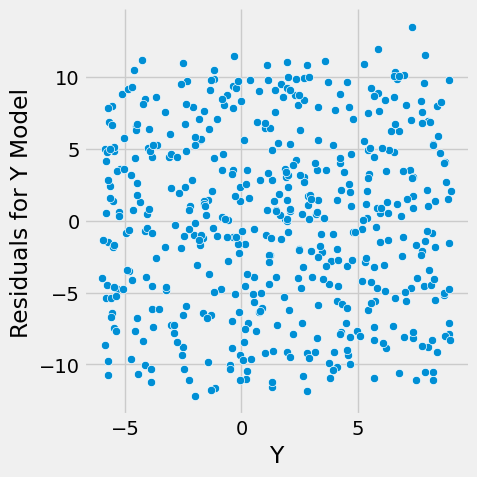

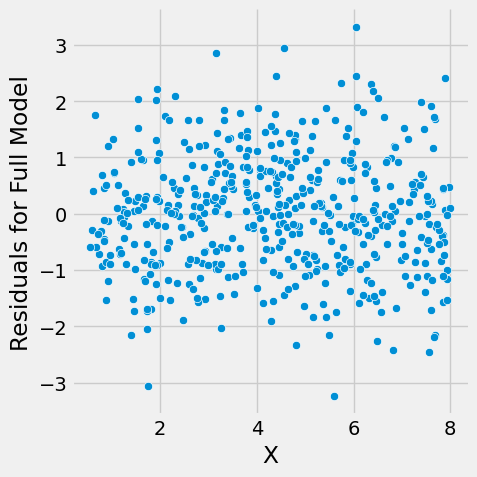

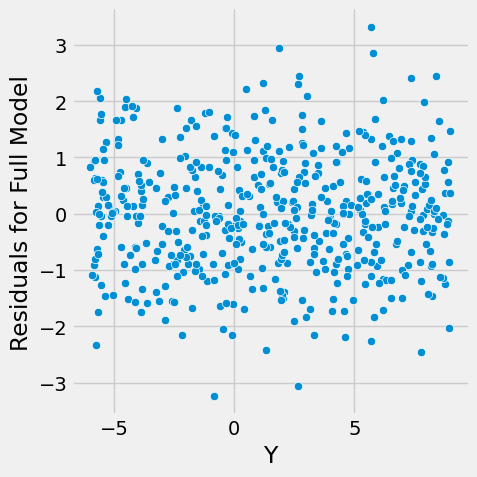

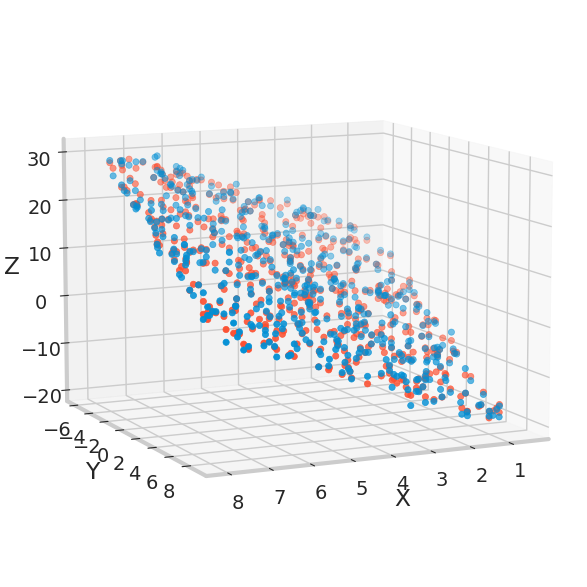

In [56]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,7));
ax = fig.add_subplot(111, projection='3d');
ax.scatter(x, y, z);
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

ax.scatter(x,y,predicted_z);
ax.view_init(elev = 10, azim = 65, roll = 0);

Once we start working in more dimensions, visualization becomes increasingly difficult and useless. Instead of predicting a line, our prediction is actually a plane of values (the red values)!

In [57]:
xx = np.array([1, 1, 2, 57, 73])
p = np.percentile(xx, 0.45)
p

1.0

In [58]:
m = np.array([.2, .5, .3])
pro1 = sample_proportions(5, m)
pro2 = sample_proportions(500, m)
pro1, pro2

(array([ 0. ,  0.8,  0.2]), array([ 0.202,  0.472,  0.326]))

You're done with HW 5! Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the HW5 assignment in **Canvas** by 11:59pm on the due date.